# [거짓말](https://www.acmicpc.net/problem/1043)

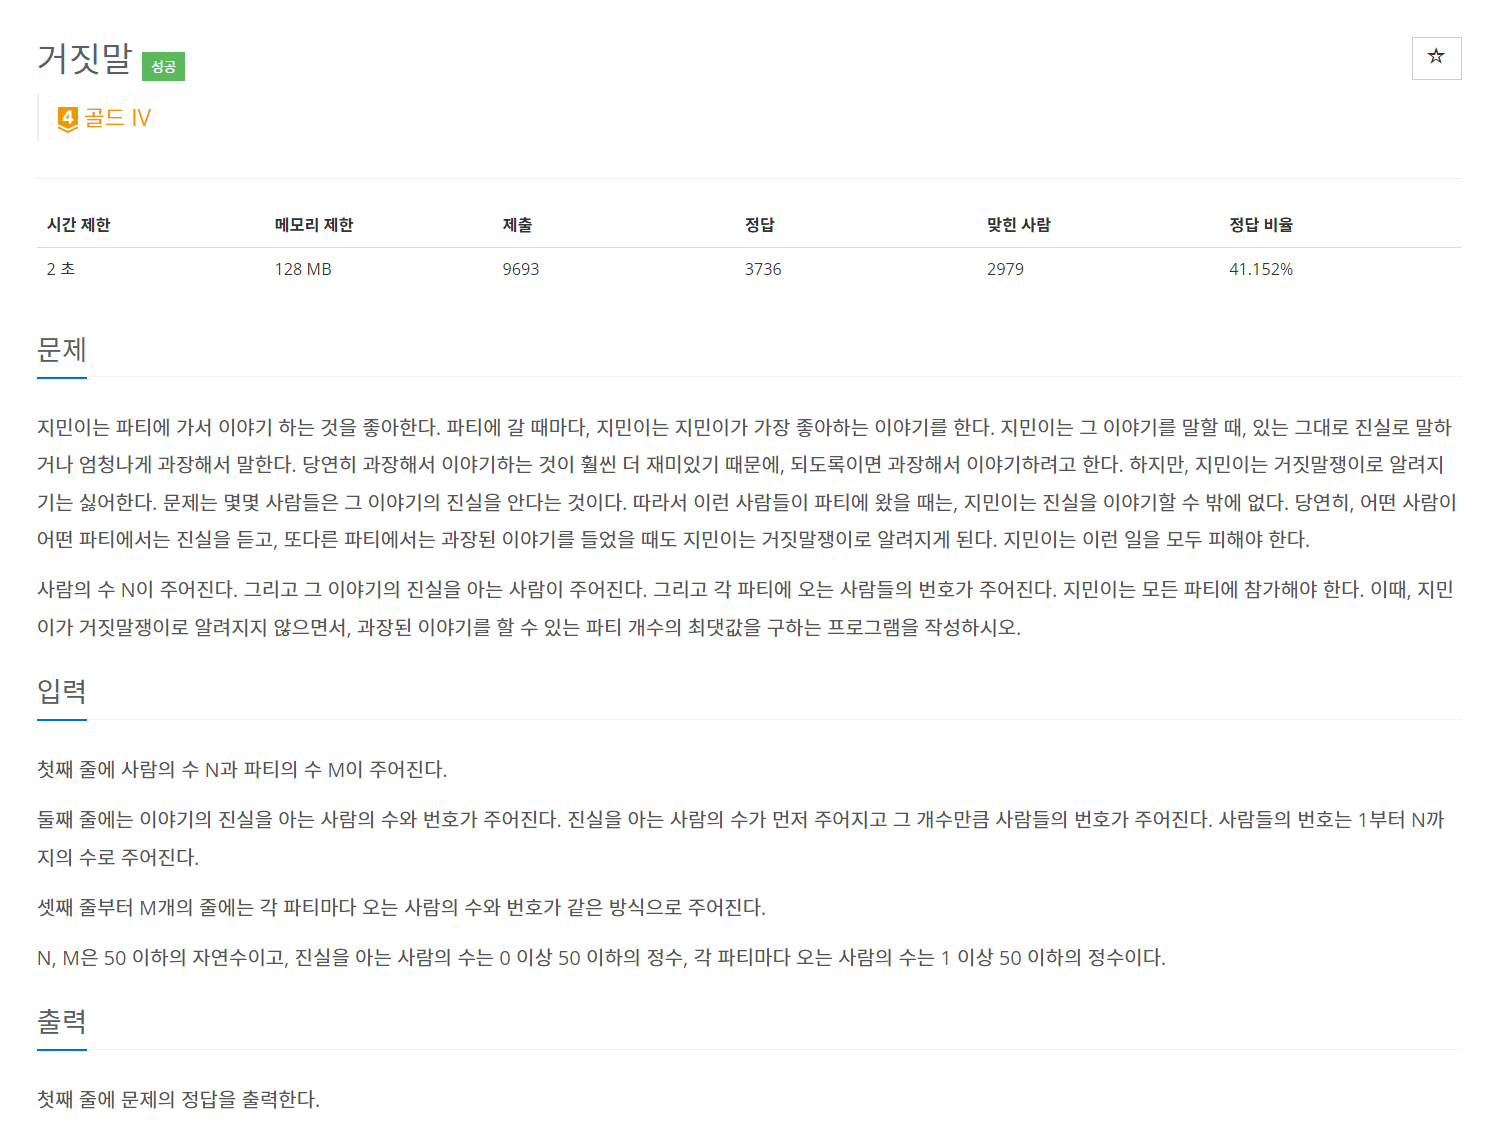

### UNION-FIND 연산을 이용한 서로소 집합 찾기


같은 파티에 참석한 사람들을 하나의 집합으로 묶고, (동일 부모를 가지도록)  
진실을 알고 있는 사람들의 집합에 속하는지 (같은 부모를 가지고 있는지) 확인한다.

<!-- ![](image/1043.png) -->

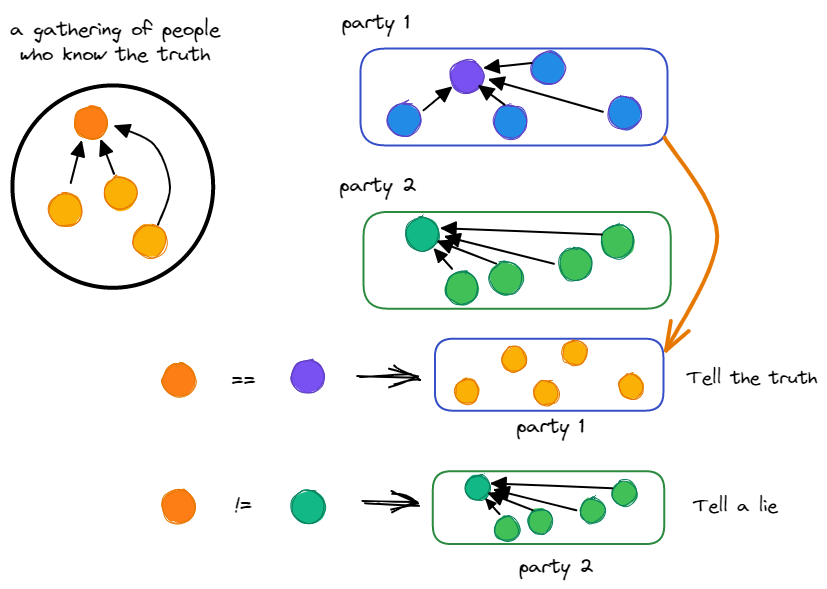

In [ ]:
# 서로소 집합
# 유니온 파인드
import sys


def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]


def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b


input = sys.stdin.readline
N, M = map(int, input().split())
parent = [i for i in range(N+1)]

truth = list(map(int, input().split()))
arr = []

for _ in range(M):
    ls = list(map(int, input().split()))
    arr.append(ls)
    for i in range(1, len(ls)):
        union_parent(parent, ls[1], ls[i])

if truth[0] == 0:
    print(M)
else:
    for i in range(1, len(truth)):
        union_parent(parent, truth[1], truth[i])

    for i in range(M):
        if find_parent(parent, arr[i][1]) == find_parent(parent, truth[1]):
            M -= 1
    print(M)
